In [17]:
# Simple selection sort in Python

import numpy as np

def selection_sort(x):
    p = x
    for i in range(len(x)):
        print(p[i:])
        swap = i + np.argmin(x[i:])
        
        print("Argmin is the index: ", np.argmin(x[i:]), "\nSwap: ", swap,
             "\nx[i]: ", x[i], "\nx[Swap]: ", x[swap])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

[2 1 4 3 5]
Argmin is the index:  1 
Swap:  1 
x[i]:  2 
x[Swap]:  1
[2 4 3 5]
Argmin is the index:  0 
Swap:  1 
x[i]:  2 
x[Swap]:  2
[4 3 5]
Argmin is the index:  1 
Swap:  3 
x[i]:  4 
x[Swap]:  3
[4 5]
Argmin is the index:  0 
Swap:  3 
x[i]:  4 
x[Swap]:  4
[5]
Argmin is the index:  0 
Swap:  4 
x[i]:  5 
x[Swap]:  5


array([1, 2, 3, 4, 5])

In [18]:
# Bogosort
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [19]:
# Numpy has a built in sort function which has a lower Big-O timing 

In [22]:
x = np.array([2, 1, 4, 3, 5])
x = np.sort(x)
x

array([1, 2, 3, 4, 5])

In [23]:
x

array([1, 2, 3, 4, 5])

In [24]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [25]:
x[i]

array([1, 2, 3, 4, 5])

In [34]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [37]:
# Sort only columns:
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [38]:
# Sort by rows:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [43]:
# Partitioning
x = np.array([70, 21, 13, 100, 36, 55, 14])
np.partition(x, 2)

array([ 13,  14,  21, 100,  36,  55,  70])

In [45]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [47]:
np.partition(X, 2, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

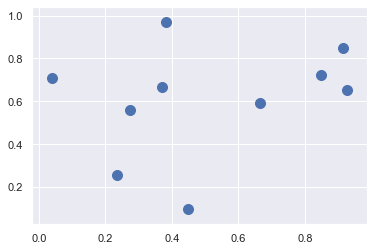

In [51]:
# K_Nearest_Neighbors

X = rand.rand(10, 2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [52]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [54]:
dist_sq

array([[0.        , 0.03971432, 0.53615183, 0.30887652, 0.07137053,
        0.43262538, 0.39806216, 0.01098053, 0.632568  , 0.78831133],
       [0.03971432, 0.        , 0.78616274, 0.32892236, 0.12896638,
        0.49330719, 0.29786335, 0.02082527, 0.81380738, 0.78422146],
       [0.53615183, 0.78616274, 0.        , 0.33500633, 0.29276457,
        0.24753085, 0.77233057, 0.5518468 , 0.07137869, 0.54583095],
       [0.30887652, 0.32892236, 0.33500633, 0.        , 0.09309942,
        0.02081182, 0.09187737, 0.23137254, 0.18856152, 0.11090307],
       [0.07137053, 0.12896638, 0.29276457, 0.09309942, 0.        ,
        0.15394115, 0.22480149, 0.05049831, 0.29722499, 0.40548423],
       [0.43262538, 0.49330719, 0.24753085, 0.02081182, 0.15394115,
        0.        , 0.18019287, 0.35545228, 0.09463239, 0.07721714],
       [0.39806216, 0.29786335, 0.77233057, 0.09187737, 0.22480149,
        0.18019287, 0.        , 0.27963512, 0.53373795, 0.18544834],
       [0.01098053, 0.02082527, 0.5518468

In [55]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [56]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [57]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape


(10, 10)

In [58]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 7 1 4 3 6 5 2 8 9]
 [1 7 0 4 6 3 5 9 2 8]
 [2 8 5 4 3 0 9 7 6 1]
 [3 5 6 4 9 8 7 0 1 2]
 [4 7 0 3 1 5 6 2 8 9]
 [5 3 9 8 4 6 2 7 0 1]
 [6 3 5 9 4 7 1 0 8 2]
 [7 0 1 4 3 6 5 2 8 9]
 [8 2 5 3 9 4 6 7 0 1]
 [9 5 3 6 8 4 2 7 1 0]]


In [60]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

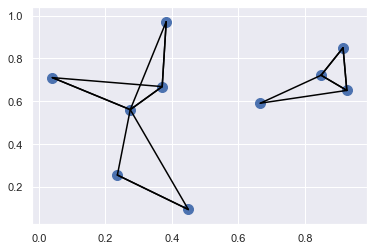

In [61]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')